# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import json
import requests
from api_keys import weather_api_key
from citipy import citipy
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [4]:
#print(weather_api_key)

## Generate Cities List

In [5]:
# City name can be found by geographic coordinates (latitude, and longitude): 
# "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

# I will use it to generate list of cities.

num_lat_lon = 3500


latitude = []
longitude = []

#Generating float random numbers (2 decimol) for lat and lon

for num_lat in np.random.uniform(-90,90,num_lat_lon):
    latitude.append(round(num_lat,1))

for num_lon in np.random.uniform(-180,180,num_lat_lon):
    longitude.append(round(num_lon,1))
    

In [6]:
# I have used the citipy library to find the nearest city for all latitudes and longitudes:
#I did "pip install citipy" first

city_list = []
country_list = []

for i in range(num_lat_lon):
    lat = latitude[i]
    lon = longitude[i]
    
    city_search = citipy.nearest_city(lat,lon)
    city = citipy.nearest_city(lat,lon)
    
    city_return = city.city_name
    
    city_list.append(city_return)


In [7]:
# Put data into DataFrame and Check duplicates

city_df = pd.DataFrame({"City Name": city_list})
city_df.value_counts()

#city_df.count()

City Name   
rikitea         126
ushuaia          93
mataura          73
albany           72
punta arenas     62
               ... 
olinda            1
ola               1
okha              1
oistins           1
a                 1
Length: 1131, dtype: int64

In [8]:
# Getting the duplicate Cities in the DataFrame.

duplicate_city_df = city_df.loc[city_df.duplicated(subset=['City Name']),'City Name'].unique()
#duplicate_city_df

In [9]:
# Create a clean DataFrame by dropping the duplicate from the DataFrame. I should have 500+ cities.

clean_city_df = city_df[city_df['City Name'].isin(duplicate_city_df)==False]
clean_city_df.value_counts()

# Total number of Cities in the clear list

number_cities_inList = len(clean_city_df['City Name'].unique())
print(number_cities_inList)


780


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#Perform a weather check on each city using a series of successive API calls.

base_url = "http://api.openweathermap.org/data/2.5/weather?"
count=0

#Units
unit = "imperial"

#df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])

clean_city_df
city_to_find=[]

temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
lon=[]
country=[]
date=[]
group = 1
number_city = 0

for index, row in clean_city_df.iterrows():
    
    count = count+1
    
    city_to_find = str(row['City Name'])
    
    #Build query URL
    querly_url = (base_url + "appid=" + weather_api_key + "&q=" + city_to_find+"&units=" + unit).format(city_to_find,weather_api_key)
    
    
    # Get weather data
    city_response = requests.get(querly_url)
    city_json = city_response.json()
    
    try:
        lat.append(city_json['coord']['lat'])
        lon.append(city_json['coord']['lon'])
        country.append(city_json['sys']['country'])
        temperature.append(city_json['main']['temp_max'])
        humidity.append(city_json['main']['humidity'])
        cloudiness.append(city_json['clouds']['all'])
        wind_speed.append(city_json['wind']['speed'])
        date.append(city_json['dt'])
        #print(f"Processing Record {count} of set | {city_to_find}")
        
        #Assining cities to groups 
        if number_city > 49:
            number_city = 0
            group = group + 1
        else:
            number_city = number_city + 1
        
        print(f"Processing Record {count} of set {group} | {city_to_find}")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        lat.append(np.nan)
        lon.append(np.nan)
        country.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)        
        date.append(np.nan)
        
        print("City not found. Skipping")
        pass
    

Processing Record 1 of set 1 | sioux lookout
Processing Record 2 of set 1 | tateyama
Processing Record 3 of set 1 | surovikino
Processing Record 4 of set 1 | santo tomas
Processing Record 5 of set 1 | nova vicosa
Processing Record 6 of set 1 | phalaborwa
Processing Record 7 of set 1 | tatawin
Processing Record 8 of set 1 | palasa
Processing Record 9 of set 1 | trat
Processing Record 10 of set 1 | tatarskaya kargala
Processing Record 11 of set 1 | biak
Processing Record 12 of set 1 | minna
Processing Record 13 of set 1 | araxa
Processing Record 14 of set 1 | eureka
Processing Record 15 of set 1 | murupara
Processing Record 16 of set 1 | mbalmayo
Processing Record 17 of set 1 | roseburg
City not found. Skipping
Processing Record 19 of set 1 | paamiut
Processing Record 20 of set 1 | quanzhou
Processing Record 21 of set 1 | launceston
Processing Record 22 of set 1 | noumea
Processing Record 23 of set 1 | hovd
Processing Record 24 of set 1 | rancho palos verdes
Processing Record 25 of set 1

Processing Record 206 of set 4 | carahue
Processing Record 207 of set 4 | pierre
Processing Record 208 of set 4 | nioro
Processing Record 209 of set 4 | andros town
Processing Record 210 of set 4 | buin
City not found. Skipping
Processing Record 212 of set 4 | bonavista
Processing Record 213 of set 4 | jiaozuo
Processing Record 214 of set 4 | griffith
Processing Record 215 of set 4 | sabang
Processing Record 216 of set 5 | maldonado
Processing Record 217 of set 5 | sinnamary
Processing Record 218 of set 5 | satipo
Processing Record 219 of set 5 | innisfail
City not found. Skipping
Processing Record 221 of set 5 | concepcion del uruguay
Processing Record 222 of set 5 | sept-iles
Processing Record 223 of set 5 | cabinda
Processing Record 224 of set 5 | chitral
City not found. Skipping
Processing Record 226 of set 5 | alizai
Processing Record 227 of set 5 | manyoni
City not found. Skipping
Processing Record 229 of set 5 | eirunepe
Processing Record 230 of set 5 | stanislav
Processing Reco

Processing Record 408 of set 8 | chapais
Processing Record 409 of set 8 | puerto del rosario
Processing Record 410 of set 8 | port shepstone
Processing Record 411 of set 8 | finschhafen
Processing Record 412 of set 8 | karangasem
Processing Record 413 of set 8 | williston
Processing Record 414 of set 8 | mount darwin
Processing Record 415 of set 8 | japura
Processing Record 416 of set 8 | karwar
Processing Record 417 of set 8 | nuevo progreso
Processing Record 418 of set 8 | ippy
Processing Record 419 of set 8 | nam phong
City not found. Skipping
Processing Record 421 of set 8 | dawson creek
Processing Record 422 of set 8 | kazachka
Processing Record 423 of set 8 | goundam
Processing Record 424 of set 8 | inta
Processing Record 425 of set 8 | canhotinho
Processing Record 426 of set 8 | fernie
Processing Record 427 of set 8 | jasper
Processing Record 428 of set 8 | sao felix do xingu
Processing Record 429 of set 8 | muyezerskiy
Processing Record 430 of set 8 | kargil
Processing Record 4

Processing Record 605 of set 12 | sierning
Processing Record 606 of set 12 | coffs harbour
Processing Record 607 of set 12 | keetmanshoop
Processing Record 608 of set 12 | gimli
Processing Record 609 of set 12 | pontianak
Processing Record 610 of set 12 | balkanabat
Processing Record 611 of set 12 | altamira
Processing Record 612 of set 12 | dunda
Processing Record 613 of set 12 | vossevangen
Processing Record 614 of set 12 | reconquista
City not found. Skipping
Processing Record 616 of set 12 | eisenberg
Processing Record 617 of set 12 | lokosovo
Processing Record 618 of set 12 | andra
City not found. Skipping
Processing Record 620 of set 12 | poronaysk
Processing Record 621 of set 12 | drayton valley
Processing Record 622 of set 12 | beasain
Processing Record 623 of set 12 | waingapu
Processing Record 624 of set 12 | parana
Processing Record 625 of set 12 | tungor
Processing Record 626 of set 12 | sardinata
City not found. Skipping
Processing Record 628 of set 12 | muskegon
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Adding values to DataFrame
clean_city_df.insert(1, "Lat", lat, True)
clean_city_df.insert(2, "Lng", lon, True)
clean_city_df.insert(3, "Max Temp", temperature, True)
clean_city_df.insert(4, "Humidity", humidity, True)
clean_city_df.insert(5, "Cloudiness", cloudiness, True)
clean_city_df.insert(6, "Wind Speed", wind_speed, True)
clean_city_df.insert(7, "Country", country, True)
clean_city_df.insert(8, "Date", date, True)

clean_city_df.head(10) #values+Nan

# removing Cities with Nan values
clean_city_df_analise = clean_city_df.dropna(how="any")
clean_city_df_analise.count()

City Name     721
Lat           721
Lng           721
Max Temp      721
Humidity      721
Cloudiness    721
Wind Speed    721
Country       721
Date          721
dtype: int64

In [12]:
#Printing DataFrame
clean_city_df_analise.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,sioux lookout,50.10,-91.92,32.00,84.0,75.0,10.29,CA,1.603234e+09
6,tateyama,34.98,139.87,60.01,73.0,10.0,16.53,JP,1.603234e+09
20,surovikino,48.61,42.85,39.51,71.0,16.0,8.72,RU,1.603234e+09
24,santo tomas,14.11,121.14,78.80,88.0,90.0,5.82,PH,1.603234e+09
26,nova vicosa,-17.89,-39.37,74.50,89.0,98.0,8.25,BR,1.603234e+09


In [13]:
#Statistics
clean_city_df_analise.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,7.210000e+02
mean,21.929681,22.068363,61.814896,72.307906,51.823856,7.137906,1.603234e+09
std,28.947570,80.677931,19.287944,21.920426,39.204496,4.885643,1.389592e+02
min,-45.870000,-174.350000,5.000000,7.000000,0.000000,0.040000,1.603234e+09
25%,-2.050000,-53.110000,48.990000,61.000000,10.000000,3.420000,1.603234e+09
50%,26.560000,26.090000,66.990000,78.000000,53.000000,5.820000,1.603234e+09
75%,46.980000,91.390000,77.270000,88.000000,90.000000,9.170000,1.603234e+09
max,70.980000,177.370000,97.000000,100.000000,100.000000,31.090000,1.603234e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Humidity > 100%
#clean_city_df_analise['Humidity'].astype(float)
clean_city_df_analise.head()

#To show Cities with HUmidity > 100

to_drop=[]

to_drop = clean_city_df_analise.index[clean_city_df_analise['Humidity'] > 100]

print(to_drop)

clean_city_df_analise
clean_city_df_analise.count()

Int64Index([], dtype='int64')


City Name     721
Lat           721
Lng           721
Max Temp      721
Humidity      721
Cloudiness    721
Wind Speed    721
Country       721
Date          721
dtype: int64

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Create a clean DataFrame by dropping the Cities with Humidity>100.

clean_city_data = clean_city_df_analise[clean_city_df_analise.index.isin(to_drop)==False]
clean_city_data
clean_city_data.count()


City Name     721
Lat           721
Lng           721
Max Temp      721
Humidity      721
Cloudiness    721
Wind Speed    721
Country       721
Date          721
dtype: int64

In [16]:
#Statistics for the final clear dataframe
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,7.210000e+02
mean,21.929681,22.068363,61.814896,72.307906,51.823856,7.137906,1.603234e+09
std,28.947570,80.677931,19.287944,21.920426,39.204496,4.885643,1.389592e+02
min,-45.870000,-174.350000,5.000000,7.000000,0.000000,0.040000,1.603234e+09
25%,-2.050000,-53.110000,48.990000,61.000000,10.000000,3.420000,1.603234e+09
50%,26.560000,26.090000,66.990000,78.000000,53.000000,5.820000,1.603234e+09
75%,46.980000,91.390000,77.270000,88.000000,90.000000,9.170000,1.603234e+09
max,70.980000,177.370000,97.000000,100.000000,100.000000,31.090000,1.603234e+09


In [32]:
# Saving city data into a csv file
clean_city_data.to_csv("output_data/cities.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

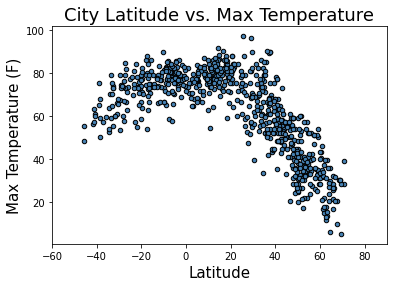

In [17]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Max Temperature',fontsize=(18));
plt.xlim(-60,90)
plt.ylabel('Max Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

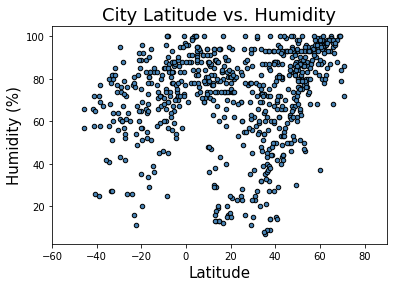

In [18]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Humidity',fontsize=(18));
plt.xlim(-60,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

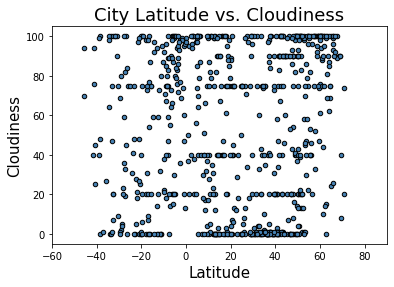

In [19]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Cloudiness',fontsize=(18));
plt.xlim(-60,90)
plt.ylabel('Cloudiness',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

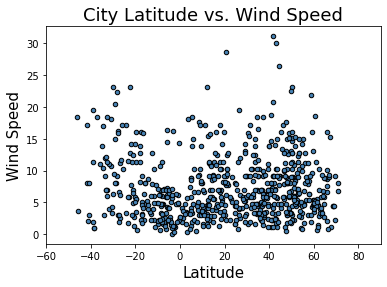

In [20]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Wind Speed',fontsize=(18));
plt.xlim(-60,90)
plt.ylabel('Wind Speed',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

# Save the plotted figure as .pngs
plt.savefig("Images/City_Latitude_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [21]:
north_hemisphere=pd.DataFrame({})
south_hemisphere=pd.DataFrame({})

north_hemisphere = clean_city_data[clean_city_data['Lat'] >=0]
north_hemisphere

south_hemisphere = clean_city_data[clean_city_data['Lat'] <=0]
south_hemisphere.dtypes

City Name      object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.704600243441084


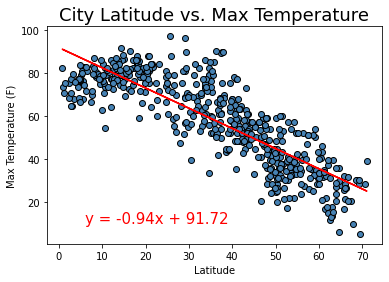

In [22]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Max Temp"]

#R-value:
corr=round(st.pearsonr(x_axis,y_axis)[0],2)


#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The r-value is {rvalue**2}")

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('City Latitude vs. Max Temperature',fontsize=(18))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Max_Temperature.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.3397893172352934


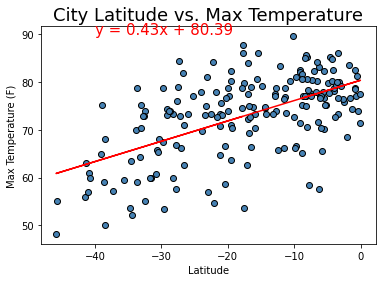

In [23]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Max Temp"]

#R-value:
#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The r-value is {rvalue**2}")

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,90),fontsize=15,color="red")
plt.title('City Latitude vs. Max Temperature',fontsize=(18))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Max_Temperature.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3397893172352934


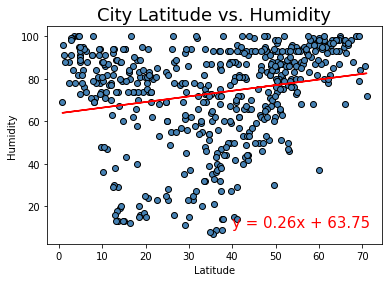

In [24]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Humidity"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity',fontsize=(18))
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.04404609862362424


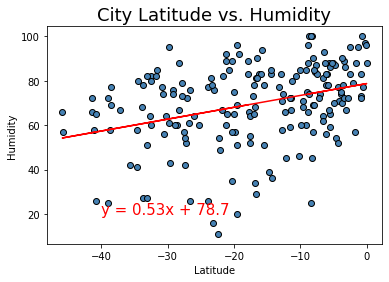

In [25]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Humidity"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity',fontsize=(18))
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Humidity.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.11742783514296194


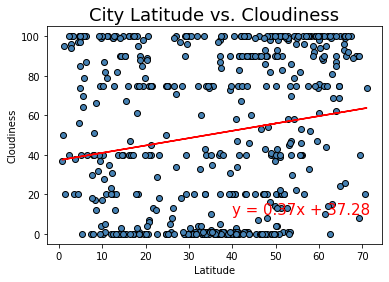

In [26]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Cloudiness"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness',fontsize=(18))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.028818584741160735


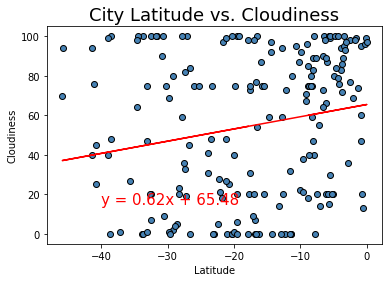

In [27]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Cloudiness"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness',fontsize=(18))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Cloudiness.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.03869331793254446


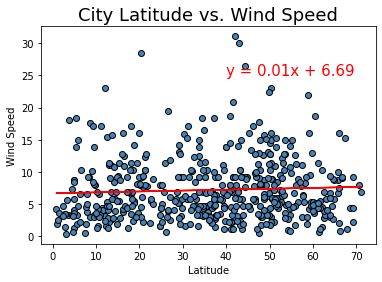

In [28]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere["Wind Speed"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Speed',fontsize=(18))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the plotted figure as .pngs
plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Wind_Speed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.002878524750614264


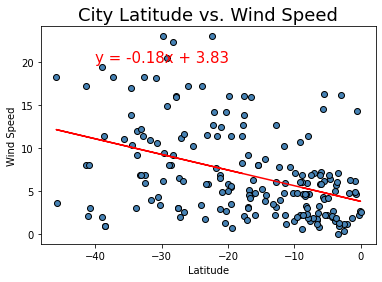

In [29]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere["Wind Speed"]

#R-value:
print(f"The r-value is {rvalue**2}")

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Speed',fontsize=(18))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the plotted figure as .pngs
plt.savefig("Images/Southern_Hemisphere_City_Latitude_vs_Wind_Speed.png")

plt.show()